##  Linear Regression

- [Linear regression with one variable](#Linear-regression-with-one-variable)
- [Gradient Descent](#Gradient-Descent)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 
from pprint import pprint
from sklearn.metrics import accuracy_score

### Linear regression with one variable

In [16]:
boston = datasets.load_boston()

M = 200 # number of records in tarining set

X = np.c_[np.ones(M),boston.data[:M,5]]
y = np.c_[boston.target[:M]]

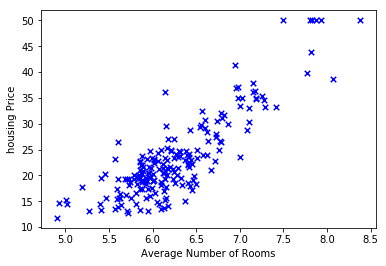

In [4]:
plt.scatter(X[:,1], y, s=30, c='b', marker='x', linewidths=1)
# plt.xlim(4,24)
plt.xlabel('Average Number of Rooms')
plt.ylabel('housing Price');

### Gradient Descent

#### Cost Function

$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}\big( h_\theta(x^{(i)}) - y^{(i)} \big)^2$$

#### Vectorized Cost Function

$$ J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}\big( X.\theta - y\big)^2 $$

In [5]:
def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [6]:
computeCost(X,y)

301.7189

#### Gradient Descent

$$ \theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \big( h_\theta(x^{(i)}) - y^{(i)} \big).x^{(i)}$$

#### Vectorized Gradient Descent

$$ \theta := \theta - \alpha \frac{1}{m} \big( X^T.(X.\theta-y) \big)$$

In [7]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.04, num_iters=29000):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

theta:  [-48.55088768  11.48551298]


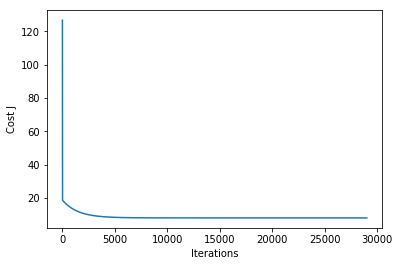

In [8]:
# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

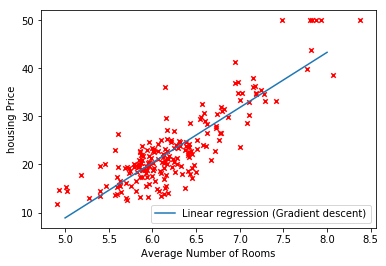

In [9]:
xx = np.arange(5,9)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=20, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')


# plt.xlim(4,24)
plt.xlabel('Average Number of Rooms')
plt.ylabel('housing Price')
plt.legend(loc=4);

#### It took 29k iteration with alpha=0.04  to converge